###Import Libraries


In [ ]:
import pandas as pd
import datetime
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Preprocessing & Descriptive Analytics

Data over het coronavirus (COVID-19)
https://data.europa.eu/euodp/nl/data/dataset/covid-19-coronavirus-data

In [ ]:
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df=pd.read_csv(url)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,10/07/2020,10,7,2020,255,20,Afghanistan,AF,AFG,38041757.0,Asia,9.812901
1,09/07/2020,9,7,2020,59,1,Afghanistan,AF,AFG,38041757.0,Asia,10.351783
2,08/07/2020,8,7,2020,210,16,Afghanistan,AF,AFG,38041757.0,Asia,10.811803
3,07/07/2020,7,7,2020,433,56,Afghanistan,AF,AFG,38041757.0,Asia,11.148276
4,06/07/2020,6,7,2020,279,38,Afghanistan,AF,AFG,38041757.0,Asia,10.824947


In [ ]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000,2.881300e+04,26096.000000
mean,15.531496,4.410188,2019.997680,424.054334,19.209786,4.605244e+07,22.869323
std,8.954613,1.665287,0.048113,2498.774610,120.413720,1.655967e+08,62.825236
min,1.000000,1.000000,2019.000000,-29726.000000,-1918.000000,8.150000e+02,-30.547460
25%,8.000000,3.000000,2020.000000,0.000000,0.000000,1.798506e+06,0.097132
50%,15.000000,5.000000,2020.000000,4.000000,0.000000,8.776119e+06,2.553878
75%,23.000000,6.000000,2020.000000,76.000000,2.000000,3.182530e+07,15.357714
max,31.000000,12.000000,2020.000000,63004.000000,4928.000000,1.433784e+09,885.924117


In [ ]:
df['dateRep'] = pd.to_datetime(df['dateRep'],dayfirst=True)
df.rename(columns={'dateRep':'date'},inplace=True)
df['dayofweek'] = df['date'].apply(lambda time: time.dayofweek)
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x > 4 else 0)

In [ ]:
df.head()

,date,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,dayofweek,weekend
0,2020-07-10,10,7,2020,255,20,Afghanistan,AF,AFG,38041757.0,Asia,9.812901,4,0
1,2020-07-09,9,7,2020,59,1,Afghanistan,AF,AFG,38041757.0,Asia,10.351783,3,0
2,2020-07-08,8,7,2020,210,16,Afghanistan,AF,AFG,38041757.0,Asia,10.811803,2,0
3,2020-07-07,7,7,2020,433,56,Afghanistan,AF,AFG,38041757.0,Asia,11.148276,1,0
4,2020-07-06,6,7,2020,279,38,Afghanistan,AF,AFG,38041757.0,Asia,10.824947,0,0


In [ ]:
cases = df.groupby(df['date']).sum()['cases']
deaths= df.groupby(df['date']).sum()['deaths']
casesinnl = df[df['geoId']=='NL'].groupby(df['date']).sum()['cases']
deathsinnl = df[df['geoId']=='NL'].groupby(df['date']).sum()['deaths']
casesbycountries = df.groupby(df['countriesAndTerritories']).sum()['cases'].sort_values(ascending = False).head(20)
deathsbycountries = df.groupby(df['countriesAndTerritories']).sum()['deaths'].sort_values(ascending = False).head(20)
weekends = df.groupby(df["weekend"]).sum()['cases']
weekendsNL = df[df['geoId']=='NL'].groupby(df["weekend"]).sum()['cases']


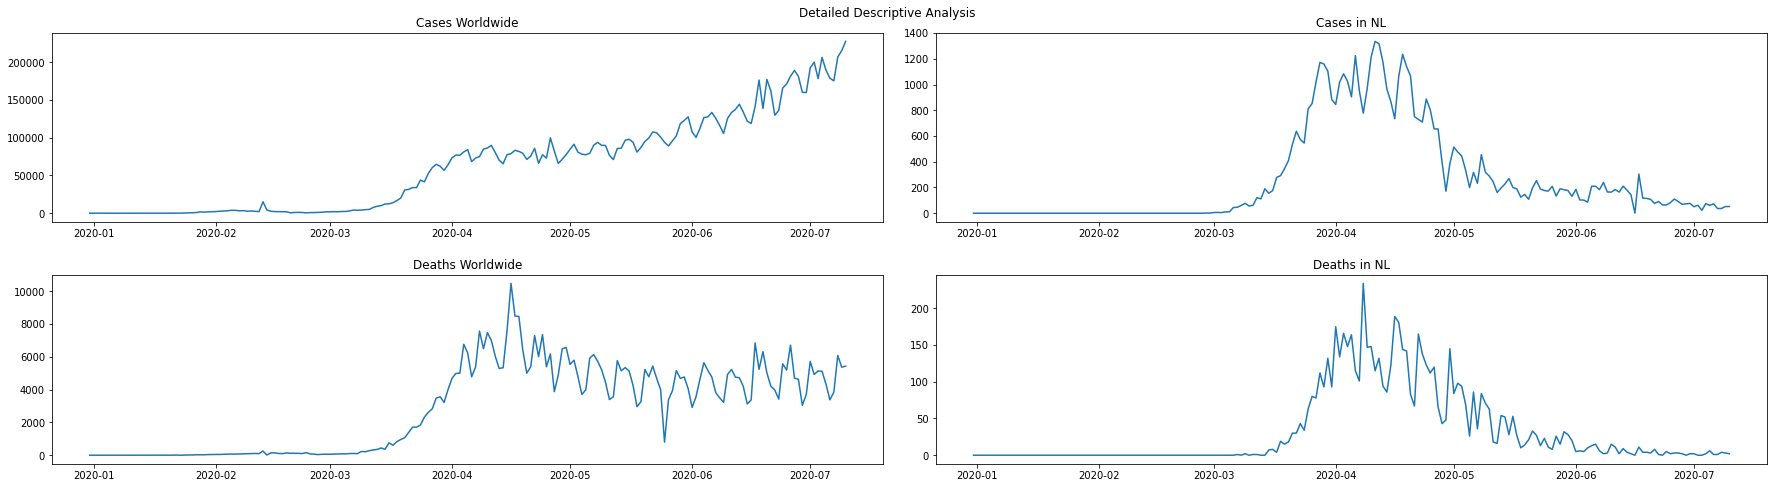

In [ ]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(25,7))
fig.suptitle('Detailed Descriptive Analysis')
ax1.set_title('Cases Worldwide')
ax1.plot(cases)
ax2.set_title('Cases in NL')
ax2.plot(casesinnl)
ax3.set_title('Deaths Worldwide')
ax3.plot(deaths)
ax4.set_title('Deaths in NL')
ax4.plot(deathsinnl)
fig.tight_layout(pad=2.0)

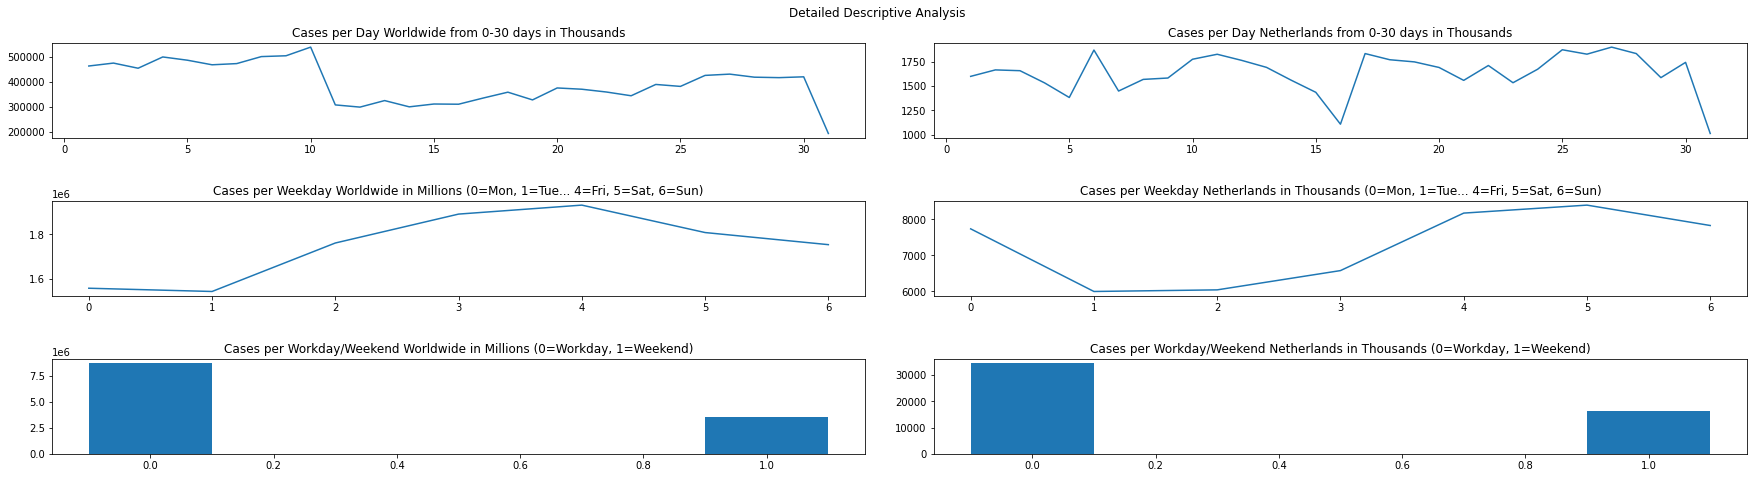

In [ ]:
fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(25,7))
fig.suptitle('Detailed Descriptive Analysis')
ax1.set_title('Cases per Day Worldwide from 0-30 days in Thousands')
ax1.plot(df.groupby(df["date"].dt.day).sum()['cases'])
ax2.set_title('Cases per Day Netherlands from 0-30 days in Thousands')
ax2.plot(df[df['geoId']=='NL'].groupby(df["date"].dt.day).sum()['cases'])
ax3.set_title('Cases per Weekday Worldwide in Millions (0=Mon, 1=Tue... 4=Fri, 5=Sat, 6=Sun)')
ax3.plot(df.groupby(df["dayofweek"]).sum()['cases'])
ax4.set_title('Cases per Weekday Netherlands in Thousands (0=Mon, 1=Tue... 4=Fri, 5=Sat, 6=Sun)')
ax4.plot(df[df['geoId']=='NL'].groupby(df["dayofweek"]).sum()['cases'])
ax5.set_title('Cases per Workday/Weekend Worldwide in Millions (0=Workday, 1=Weekend)')
ax5.bar(weekends.index, weekends.values,width=0.2)
ax6.set_title('Cases per Workday/Weekend Netherlands in Thousands (0=Workday, 1=Weekend)')
ax6.bar(weekendsNL.index,weekendsNL.values, width=0.2)
fig.tight_layout(pad=3.0)

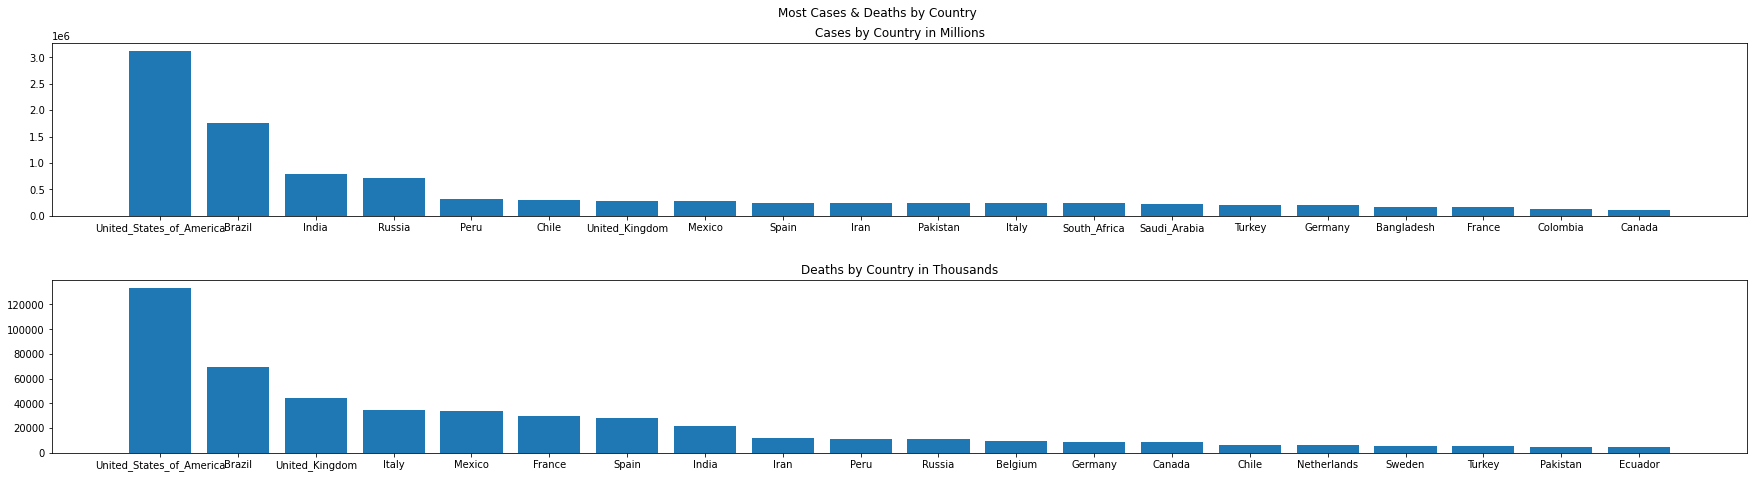

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(25,7))
fig.suptitle('Most Cases & Deaths by Country')
ax1.set_title('Cases by Country in Millions')
ax1.bar(casesbycountries.index,casesbycountries.values)
ax2.set_title('Deaths by Country in Thousands')
ax2.bar(deathsbycountries.index,deathsbycountries.values)
fig.tight_layout(pad=3.0)